In [ ]:
!pip install numpy==1.19.5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
!pip install yfinance
import yfinance as yf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
!pip install tensorflow==2.6.2
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
crypto_currency = 'BTC'
fiat_currency = 'USD'

In [ ]:
start=dt.datetime(2015,1,1)
end=dt.datetime.now()

In [ ]:
data= yf.download('BTC-USD',start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
prediction_days = 60
x_train, y_train = [], []

In [ ]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Creating Neural Network

In [ ]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
79/79 [==============================] - 11s 73ms/step - loss: 0.0082
Epoch 2/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0024
Epoch 3/25
79/79 [==============================] - 6s 73ms/step - loss: 0.0019
Epoch 4/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0019
Epoch 5/25
79/79 [==============================] - 6s 75ms/step - loss: 0.0018
Epoch 6/25
79/79 [==============================] - 6s 75ms/step - loss: 0.0017
Epoch 7/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0016
Epoch 8/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0017
Epoch 9/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0014
Epoch 10/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0011
Epoch 11/25
79/79 [==============================] - 6s 82ms/step - loss: 0.0013
Epoch 12/25
79/79 [==============================] - 6s 72ms/step - loss: 0.0013
Epoch 13/25
79/79 [=================

# Testing the Model

In [ ]:
test_start= dt.datetime(2021,9,1)
test_end= dt.datetime.now()

In [ ]:
test_data= yf.download('BTC-USD',test_start, test_end)
actual_price= test_data['Close'].values

[*********************100%***********************]  1 of 1 completed


In [ ]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scalar.fit_transform(model_inputs)

In [ ]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
prediction_prices = model.predict(x_test)
prediction_prices = scalar.inverse_transform(prediction_prices)

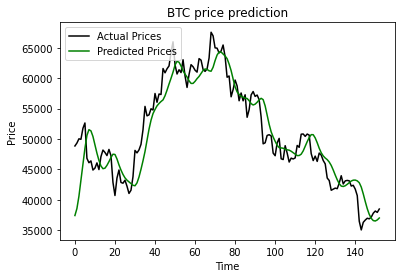

In [ ]:
plt.plot(actual_price, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='Green', label='Predicted Prices')
plt.title('BTC price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Predict Next Date

In [ ]:
real_data = [model_inputs[len(model_inputs)+ 10 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [ ]:
prediction = model.predict(real_data)
prediction = scalar.inverse_transform(prediction)
print(prediction)

[[37399.645]]
